<a href="https://colab.research.google.com/github/dcaamano/Grupo_Hidraulica_E-M/blob/main/Taller_5_Energ%C3%ADa_y_Fuerza_Espec%C3%ADfica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller Energía y Fuerza Específica. 

Recordemos la relación existente entre la energía y la fuerza específica. 

1) En el caso que se conozca la pérdida de energía, conviene aplicar la conservación de energía (energía específica, E)

2) En el caso que se conozcan la o las fuerzas involucradas, conviene aplicar la conservación de la cantidad de movimiento (Fuerza específica, M)

Para el caso unidimensional estacionario, cada principio de conservación entregará una ecuación. Por lo tanto, en aquellos casos con mas de una variable desconocida deberemos combinar su uso (i.e. continuidad de masa, energía y cantidad de movimiento).

<center><img src="https://raw.githubusercontent.com/dcaamano/Grupo_Hidraulica_E-M/main/Taller5_Fig1.png" alt="Compresión confinada" width="800"></center>


**Figura 1** Indica las gráficas conjuntas de la fuerza específica y la energía específica. Cuando el flujo se somete al control de una compuerta y de un regimen subcrítico desde aguas abajo de la sección 3. $\Delta M$ representa la fuerza de la compuerta y $\Delta E$ la pérdida de energía en el resalto hidráulico. Recordar que $y_1$ e $y_2$ se denominan alturas alternas y $y_2$ e $y_3$ alturas conjugadas.

In [1]:
#@title Definición de librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as wg

**Ejemplo**
Un canal rectangular de ancho de $3m$ posee una compuerta que controla las alturas de agua tal cual se representa en la Figura 1. La altura del flujo aguas arriba de la compuerta es $3m$ y la compuerta presenta una apertura de $0.92m$ con un coeficiente de contracción $C_c = 0.61$. Entonces, calcule la fuerza aplicada sobre la compuerta asumiendo pérdidas de energía despreciables.

Respuesta: La fuerza no se puede estimar directamente con la ecuación de energía. Sin embargo, el uso combinado de las conservaciones de masa (i.e. continuidad), energía (i.e. energia específica), y cantidad de movimiento (i.e. fuerza específica) es de gran utilidad práctica. En este caso es necesario utilizar los 3 principios de conservación.

In [2]:
#@title Constantes y variables conocidas
#Definición de constantes y variables conocidas para el desarollo del ejercicio
g = 9.81 #m/s2
ro = 1000 #kg/m3

b = 3 #m
y1 = 3 #m

y_apertura = 0.92 #m
C_contraccion = 0.61

y2 = y_apertura*C_contraccion

Conservación de la energía en términos de la energía específica

$$E_{1}=E_{2}$$

$$y_{1}+\frac{u_{1}^{2}}{2g}= y_{2}+\frac{u_{2}^{2}}{2g}$$

Conservación de la masa $Q_{1}=Q_{2}$, $$u_{1}y_{1}b=u_{2}y_{2}b$$ 

$$u_{2}=\frac{u_{1}y_{1}b}{y_{2}b}$$

$$u_{2}=\frac{u_{1}y_{1}}{y_{2}}$$

Se obtiene entonces un sistema de dos ecuaciones y dos incógnitas ($u_1$, $u_2$)

In [14]:
#@title Función para resolver el sistema de 2 ecuaciones anterior
def Sistema(x):
    u1 = x[0]
    u2 = x[1]
    
    F = np.zeros(2)
    F[0] = y1 + u1**2/(2*g) - (y2 + u2**2/(2*g))
    F[1] = (u1*y1)/y2 - u2
    return F

x_inicial = np.array([1, 3])
x = fsolve(Sistema, x_inicial)
u1 = x[0]
u2 = x[1]
q = u1*y1
print("u1 = ", np.round(x[0],2), "m/s",' ; ', "u2 = ", np.round(x[1],2), "m/s"' ; ', "q = ", np.round(q,2), "m2/s")

u1 =  1.32 m/s  ;  u2 =  7.04 m/s ;  q =  3.95 m2/s


Finalmente utilizando la conservación de la cantidad de movimiento en términos de la fuerzas específica, 

$$ M_{1}- \frac{F}{\gamma}= M_{2}$$

$$\frac{F}{\gamma} = M_{1}- M_{2}$$

$$\frac{F}{\gamma} = \frac{y_{1}^{2}}{2} + \frac{q^{2}}{gy_{1}}-\left(\frac{y_{2}^{2}}{2} + \frac{q^{2}}{gy_{2}}\right)$$

In [9]:
#@title Calculo de fuerzas específicas 
M1 = y1**2/2 + q**2/(g*y1)
M2 = y2**2/2 + q**2/(g*y2)
F_e= M1 - M2
F = F_e*ro*g*b
print("La fuerza específica por unidad de ancho es ", round(F_e,2), "[Fuerza/(Peso*Ancho)]")
print("Por lo tanto la fuerza en la compuerta es ", round(F/1000,2), "(kN)")

La fuerza específica por unidad de ancho es  2.04 [Fuerza/(Peso*Ancho)]
Por lo tanto la fuerza en la compuerta es  59.94 (kN)


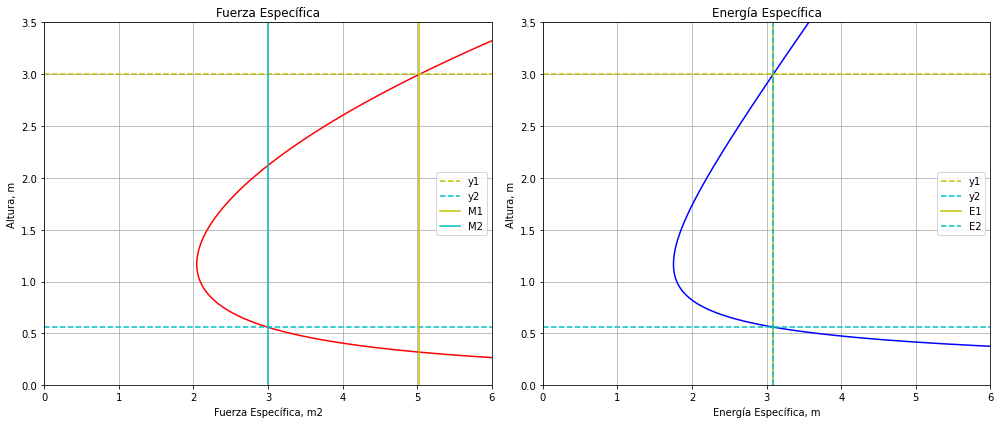

In [5]:
#@title Solución gráfica
#Ahora los mismos resultados en forma gráfica 
#La fuerza y la energía específicas representan una altura de agua en común, 
#consecuentenente pueden utilizarse en conjunto a través de lineas horizontales

E1 = y1 + u1**2/(2*g)
E2 = y2 + u2**2/(2*g)

y = np.linspace(0,20,1000)
M_q = y**2/2 + q**2/(g*y)
E_q = y + q**2/(2*g*y**2)

fig, (ax0, ax1) =plt.subplots(ncols=2, figsize=(14,6))

ax0.plot(M_q, y, 'r')
ax0.set_title('Fuerza Específica')
ax0.set_xlim([0,6])
ax0.set_ylim([0,3.5])
ax0.set_xlabel("Fuerza Específica, m2")
ax0.set_ylabel("Altura, m")
ax0.axhline(y=y1, color='y', label='y1', ls='--')
ax0.axhline(y=y2, color='c', label='y2', ls='--')
ax0.axvline(x=M1, color='y', label='M1', ls='-')
ax0.axvline(x=M2, color='c', label='M2', ls='-')
ax0.legend(loc='best')
ax0.grid()

ax1.plot(E_q, y,'b')
ax1.set_title('Energía Específica')
ax1.set_xlim([0, 6])
ax1.set_ylim([0, 3.5])
ax1.set_xlabel("Energía Específica, m")
ax1.set_ylabel("Altura, m")
ax1.axhline(y=y1, color='y',label='y1',ls='--')
ax1.axhline(y=y2, color='c',label='y2',ls='--')
ax1.axvline(x=E1, color='y',label='E1',ls='-')
ax1.axvline(x=E2, color='c',label='E2',ls='--')
ax1.legend(loc = 'best')
ax1.grid()

fig.tight_layout()
plt.show()

In [52]:
#@title Programación Widget. Permite variar los valores de las alturas por medio de un GUI.
def f(y1,ya):
    y2 = ya*C_contraccion
    
    def Sistema(x):
        u1 = x[0]
        u2 = x[1]
    
        F = np.zeros(2)
        F[0] = y1 + u1**2/(2*g) - (y2 + u2**2/(2*g))
        F[1] = (u1*y1)/y2 - u2
        return F

    x_inicial = np.array([1, 3])
    x = fsolve(Sistema, x_inicial)
    u1 = x[0]
    u2 = x[1]
    q = u1*y1
    
    M1 = y1**2/2 + q**2/(g*y1)
    M2 = y2**2/2 + q**2/(g*y2)
    Fe = M1 - M2
    F  = Fe*ro*g*b

    E1 = y1 + u1**2/(2*g)
    E2 = y2 + u2**2/(2*g)

    y_q = np.linspace(0,20,1000)
    M_q = y_q**2/2 + q**2/(g*y_q)
    E_q = y_q + q**2/(2*g*y_q**2)

    fig, (ax0, ax1, ax2) =plt.subplots(ncols=3, figsize=(15,6))

    ax0.set_title('Compuerta y alturas de agua')
    ax0.set_xlim([0, 15])
    ax0.set_ylim([0, 6])
    ax0.set_xlabel("Accionar de la compuerta")
    ax0.set_ylabel("Altura, m")
    ax0.axhline(y=y1,xmax=3/6, color='b',label='y1',ls='-')
    ax0.axhline(y=y2,xmin=8/15, color='b',label='y2',ls='-')
    ax0.axvline(x=7.5, ymin= ya*0.25/1.5, color='k',label='Compuerta',ls='-', lw = 5)
    ax0.legend(loc = 'best')
    ax0.grid()

    ax1.plot(E_q, y_q,'b')
    ax1.set_title('Energía Específica')
    ax1.set_xlim([0, 15])
    ax1.set_ylim([0, 6])
    ax1.set_xlabel("Energía Específica, m")
    ax1.set_ylabel("Altura, m")
    ax1.axhline(y=y1, color='y',label='y1',ls='--')
    ax1.axhline(y=y2, color='c',label='y2',ls='--')
    ax1.axvline(x=E1, color='y',label='E1',ls='-')
    ax1.axvline(x=E2, color='c',label='E2',ls='--')
    ax1.legend(loc = 'best')
    ax1.grid()

    ax2.plot(M_q, y_q, 'r')
    ax2.set_title('Fuerza Específica')
    ax2.set_xlim([0,15])
    ax2.set_ylim([0,6])
    ax2.set_xlabel("Fuerza Específica, m2")
    ax2.set_ylabel("Altura, m")
    ax2.axhline(y=y1, color='y', label='y1', ls='--')
    ax2.axhline(y=y2, color='c', label='y2', ls='--')
    ax2.axvline(x=M1, color='y', label='M1', ls='-')
    ax2.axvline(x=M2, color='c', label='M2', ls='-')
    ax2.legend(loc='best')
    ax2.grid()

    fig.tight_layout()
    plt.show()    

In [54]:
#@title Resultados gráficos para $y_1$ e $y_a$ variables en metros. Aturas aguas arriba y de apertura de la compuerta, respectivamente. 
wg.interact(f, y1=(2,5,0.2), ya=(0.1,1.5,0.1))
plt.show()

interactive(children=(FloatSlider(value=3.0, description='y1', max=5.0, min=2.0, step=0.2), FloatSlider(value=…

##Algunas preguntas para discutir en su grupo

1) ¿Es la fuerza sobre la compuerta hidroestática? Justifique con un análisis. Recuerde los cálculos de fuerzas sobre superficies planas vistos en mecánica de fluidos.

2) ¿Puede realizar el cálculo de la fuerza si en la compuerta se produce una pérdida de energía no despreciable, pero conocida. Por ejemplo $\Delta E = 0.2m$? ¿Qué cambios ocurren en el gráfico de la energía específica?

3) ¿Qué sucedería con la fuerza si la compuerta se cierra en un 50% de su apertura inicial?

4) ¿Qué sucedería con la fuerza si la compuerta se abre en un 50% de su apertura inicial? 

5) ¿Qué sucedería con la fuerza si $y_1$ aumenta en $1.0m$?

6) ¿Qué sucedería con la fuerza si $y_1$ disminuye en $1.0m$?

7) ¿Podría asegurar que la altura del flujo aguas abajo de la compuerta será siempre calculable por $y_2 = y_{apertura}*C_c$?